### Imports

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft # For the fourier transform
from scipy.interpolate import griddata # For the interpolation

### Import point clouds

Assuming slip to be in the $\pm x$ direction, fault normal to be in the $\pm z$ direction.  

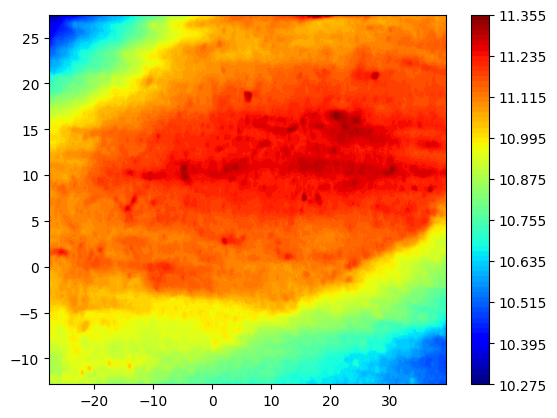

In [40]:
# Import the data (Only x, y, z coordinates)
data = np.loadtxt('../surfaces/vertices.txt', usecols=(0,1,2))


def interpolate(raw_data):
    """
    Interpolates the data onto a regular grid.

    Input:
    raw_data: The raw data to be interpolated. 
    Should be a numpy array with 3 columns, where the first two columns are the x and y coordinates, 
    and the third column is the z coordinate.

    Output:
    fit_data: Data interpolated onto a regular grid.
    """

    # Spacing of the grid
    # Calculated by taking the difference between the first two points
    x_spacing = abs(round(raw_data[0,0] - raw_data[1,0], 3)) # Round to 2 decimal places
    y_spacing = abs(round(raw_data[0,1] - raw_data[1,1], 3))

    # Length of the grid in x and y
    # Calculated by taking the difference between the first and last points
    x_length = abs(round(raw_data[0,0] - raw_data[-1,0], 3))
    y_length = abs(round(raw_data[0,1] - raw_data[-1,1], 3))
    
    # Create a regular grid using meshgrid
    # Here, length // spacing = number of points
    x = np.linspace(np.min(raw_data[:,0]), np.max(raw_data[:,0]), int(x_length // x_spacing)) 
    y = np.linspace(np.min(raw_data[:,1]), np.max(raw_data[:,1]), int(y_length // y_spacing))
    X, Y = np.meshgrid(x, y)

    # Interpolate the data onto the grid
    # fit_data[0] is the bottom row, fit_data[-1] is the top row. fit_data[:,0] is the left column, fit_data[:,-1] is the right column. 
    # Index row by row by going from fit_data[0] to fit_data[-1] for fft.
    fit_data = griddata(raw_data[:,0:2], raw_data[:,2], (X, Y), method='linear')

    return fit_data

def psd(data_array):
    